## Librerías

In [27]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns

## Lectura, selección de columnas y conversión de datos

In [28]:
##Lectura de los datos
df = pd.read_csv('netflix_titles.csv')

##Cantidad de valores nulos

##La columna director tiene 2634 datos faltantes. Seguido de country y cast con 831 y 825 faltantes respectivamente.
df.isna().sum().sort_values(ascending=False) 
##Esto es equivalente a que el 29.9% de los datos de director son nulos.
df.isna().sum().sort_values(ascending=False)/df.shape[0]*100 

##Remplazar los valores nulos con la moda
df['director'] = df['director'].fillna(df['director'].mode()[0])
df['cast'] = df['cast'].fillna(df['cast'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

##Información básica del dataframe antes de la conversión
# df.info()   ##Todas las columnas tienen datos de tipo objeto (string) excepto el año de salida del show

# ##Convertir el año de adición de la película/serie a DateTime
df['date_added'] = df['date_added'].str.strip() ##Primero se debe solucionar que algunos valores tienen espacios vaciós en medio
df['date_added'] = pd.to_datetime(df['date_added'],format = '%B %d, %Y')

# ##Verificar filas repetidas
df.duplicated().sum() #No hay filas repetidas

# ## Optimizar los datos de la columna release year
df = df.astype({'release_year':int})

# ##Eliminar columnas innecesarias
df.drop(columns=['description','show_id'],inplace=True)



### Estilos para los gráficos

In [29]:
#-------------------------Estilos para los gráficos
import matplotlib as mpl
plt.style.use("fivethirtyeight") 
mpl.rcParams["font.size"]=10.5 
mpl.rcParams["legend.fontsize"]=14
mpl.rcParams["font.family"]="serif"
mpl.rcParams["font.weight"]="bold"
mpl.rcParams["legend.fancybox"]=True
mpl.rcParams["xtick.labelsize"]=10
mpl.rcParams["ytick.labelsize"]=16
mpl.rcParams["figure.titleweight"]="bold"
mpl.rcParams["axes.labelweight"]="bold"
mpl.rcParams["figure.facecolor"]="white"
mpl.rcParams["axes.facecolor"]="white"
mpl.rcParams["axes.edgecolor"]="0.2"
mpl.rcParams["axes.linewidth"]=1
mpl.rcParams["axes.titleweight"]="bold"
mpl.rcParams["axes.labelsize"]=16
mpl.rcParams["figure.titlesize"]=20
mpl.rcParams["axes.titlesize"]=25
mpl.rcParams["figure.labelsize"]=16
mpl.rcParams["figure.labelweight"]="bold"
mpl.rcParams['axes.grid']=False

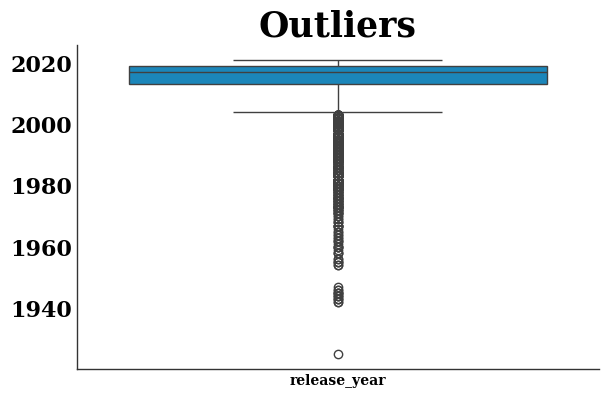

In [30]:
#Crear figura para el gráfico
fig, ax = plt.subplots(figsize=(6,4))

sns.boxplot(data=df,ax=ax)
ax.set_title('Outliers')
ax.spines[['top','right']].set_visible(False)
plt.show()

##La columna de año de estreno tiene muchos valores por fuera del rango intercuartílico. Vamos a trabajar solo con valores dentro de un rango 1.5 veces el rango intercuartílico.

q1 = df['release_year'].quantile(0.25)
q3 = df['release_year'].quantile(0.75)

iqr = q3-q1
limite_inferior = q1 - 1.5*iqr
limite_superior = q3 + 1.5*iqr

df_filtered = df.loc[(df['release_year']>=limite_inferior)&(df['release_year']<=limite_superior)]


### Análisis exploratorio - Distribución de los datos

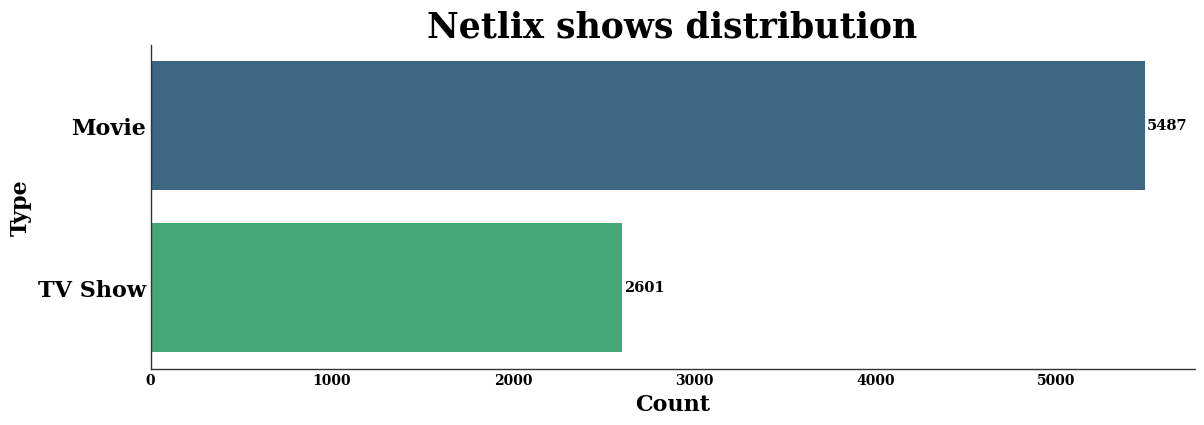

In [31]:
##Tipo de show

fig, ax = plt.subplots(figsize=(12,4))

shows = df_filtered['type'].value_counts().reset_index()


sns.barplot(data=shows,y='type',x='count',hue='type',palette='viridis').set_title('Netlix shows distribution')
ax.spines[['top','right']].set_visible(False)
ax.set_xlabel('Count')
ax.set_ylabel('Type')
for i, valor in enumerate(shows['count']):
    plt.text(valor+10, i, str(valor), va='center', ha='left')

plt.show()

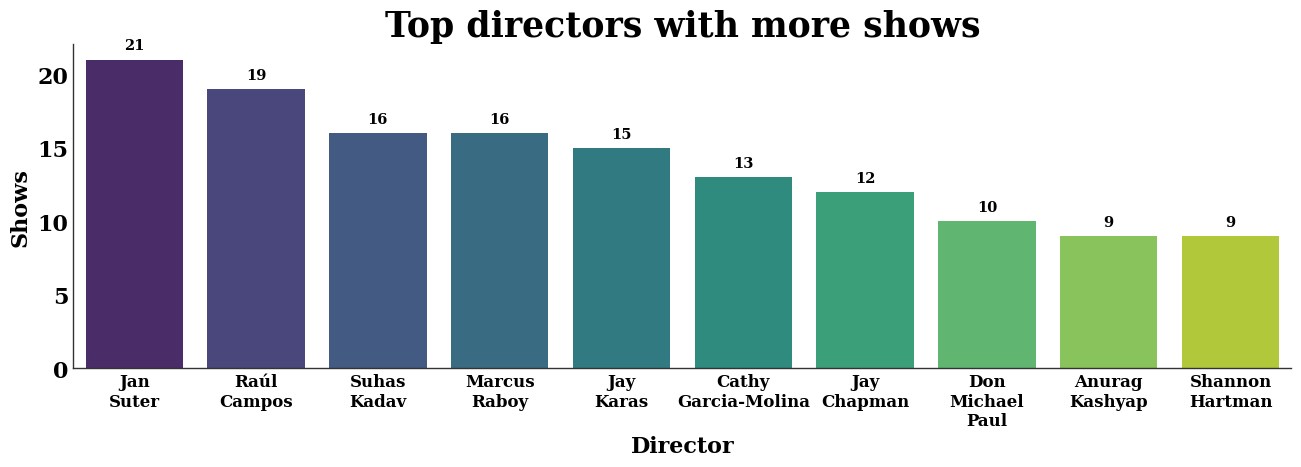

In [32]:
##Mejores directores
fig, ax = plt.subplots(figsize=(14,4))


##El director Rajiv Chilaka aparece demasiadas veces respecto a los demás directores. Vamos a dejarlo por fuera de momento.

top_directors = df_filtered['director'].str.split(', ',expand=True).stack().value_counts(sort=True).head(11).reset_index()

top_directors = top_directors.drop(0,axis=0)

sns.barplot(data=top_directors,x='index',y='count',hue='index',palette='viridis')

ax.set_xlabel('Director')
ax.set_ylabel('Shows')
ax.set_title('Top directors with more shows')

labels = [i.replace(' ','\n') for i in top_directors['index']]
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.tick_params(labelsize=12,axis='x',rotation=0)
ax.spines[['top','right']].set_visible(False)

for x, y in enumerate(top_directors['count']):
    plt.text(x, y + 0.5, str(y), ha='center', va='bottom')
plt.show()

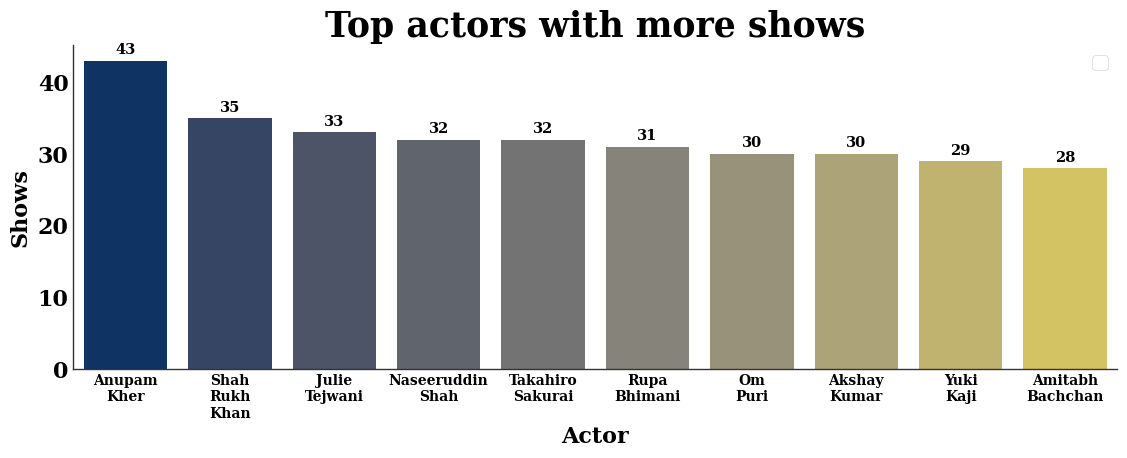

In [33]:
## Top actores del reparto

##Figura
fig, ax = plt.subplots(figsize=(12,4))
top_cast = df['cast'].str.split(', ',expand=True).stack().value_counts(sort=True).head(11).reset_index()

##El actor David Attenborough aparece demasiado. Opaca a los demás. Vamos a dejarlo por fuera de momento. 

top_cast = top_cast.drop(0,axis=0)


sns.barplot(data=top_cast,x='index',y='count',hue='index',palette='cividis')
ax.set_xlabel('Actor')
ax.set_ylabel('Shows')
ax.set_title('Top actors with more shows')

labels = [i.replace(' ','\n') for i in top_cast['index']]

ax.legend('')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.tick_params(axis='x',rotation=0)
ax.spines[['top','right']].set_visible(False)

for x, y in enumerate(top_cast['count']):
    plt.text(x, y + 0.5, str(y), ha='center', va='bottom')

plt.show()

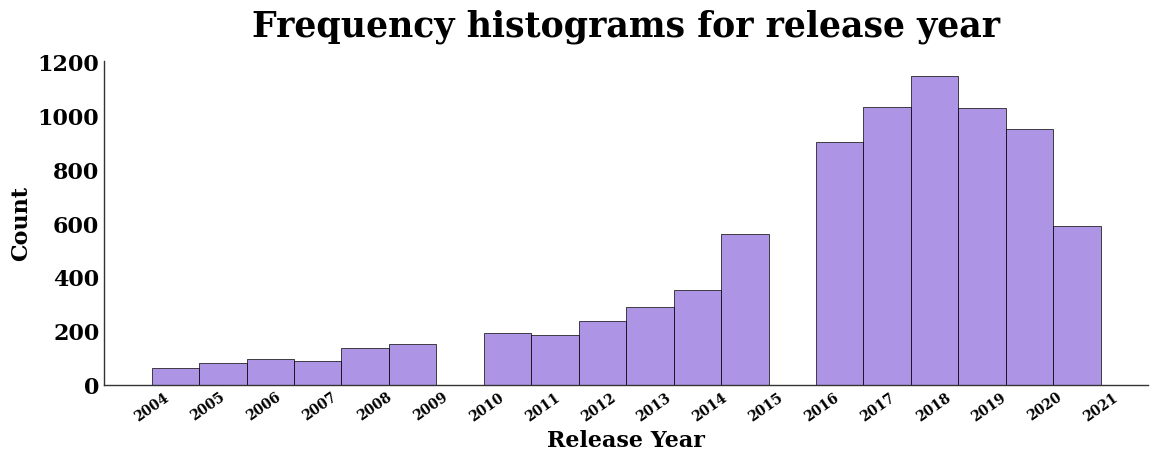

In [34]:
##año de estreno de los shows/películas
fig, ax = plt.subplots(figsize=(12,4))


sns.histplot(data=df_filtered['release_year'],ax=ax,bins=20,edgecolor='k',color='mediumpurple')
ax.set_xticks(sorted(df_filtered['release_year'].unique()))
ax.tick_params(rotation=35,axis='x')
ax.spines[['top','right']].set_visible(False)
ax.set_xlabel('Release Year')
ax.set_title('Frequency histograms for release year',y=1.05)

plt.show()

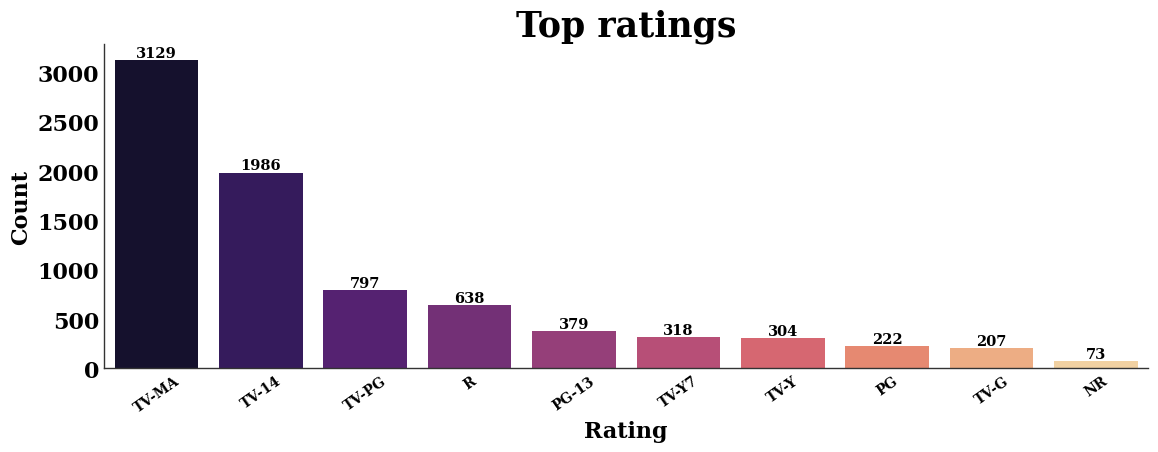

In [35]:
## Distribución de las calificaciones (Rating)

fig, ax = plt.subplots(figsize=(12,4))

top_rating =df_filtered['rating'].value_counts(sort=True).head(10).reset_index()

sns.barplot(data=top_rating,x='rating',y='count',hue='rating',palette='magma')
# top_rating.plot.bar(xlabel='Rating',title='Rating distribution',ylabel='Count',ax=ax)

ax.set_title('Top ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.spines[['top','right']].set_visible(False)

for x, y in enumerate(top_rating['count']):
    plt.text(x, y + 0.5, str(y), ha='center', va='bottom')

ax.tick_params(axis='x',rotation=35)
plt.show()

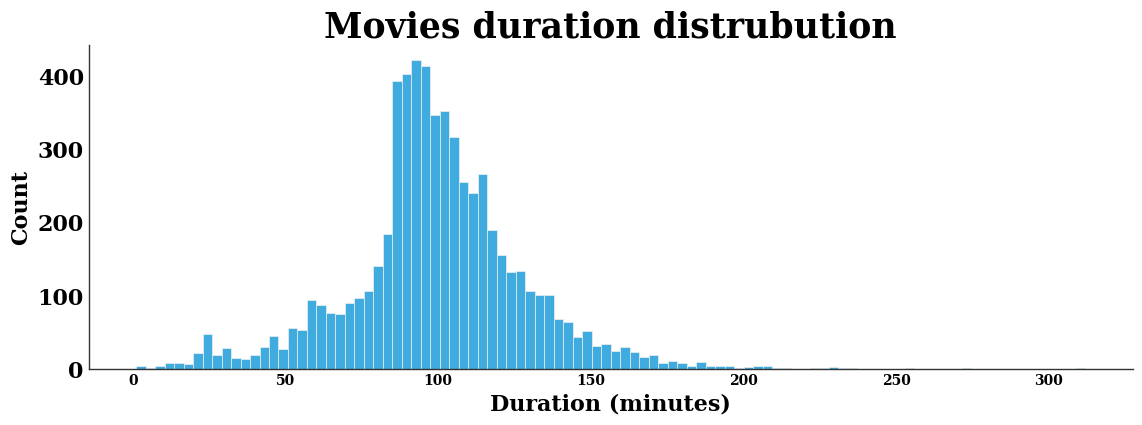

In [36]:
##Distribución de la duración de las películas
films = df.loc[df['type']=='Movie']
films = films['duration'].str.split(' ',expand=True).drop(columns=1).astype(int)

fig, ax = plt.subplots(figsize=(12,4))

sns.histplot(data=films,x=0,bins=100)

ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Count')
ax.set_title('Movies duration distrubution')
ax.spines[['top','right']].set_visible(False)
# plt.show()

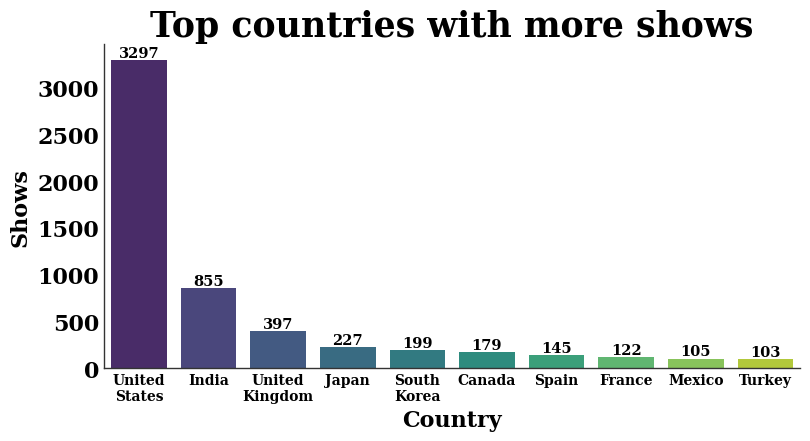

In [37]:
##Paises con más producciones

fig, ax = plt.subplots(figsize=(8,4))

top_countries = df_filtered['country'].value_counts(sort=True).head(10).reset_index()
sns.barplot(data=top_countries,ax=ax,x='country',y='count',hue='country',palette='viridis')
ax.set_xlabel('Country')
ax.set_ylabel('Shows')
ax.set_title('Top countries with more shows')

labels =  [i.replace(' ','\n') for i in top_countries['country']]
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.tick_params(rotation=0, axis='x')

ax.spines[['top','right']].set_visible(False)

for i, valor in enumerate(top_countries['count']):
    ax.text(i,valor + 0.5,str(valor),va='bottom',ha='center')
    
plt.show()

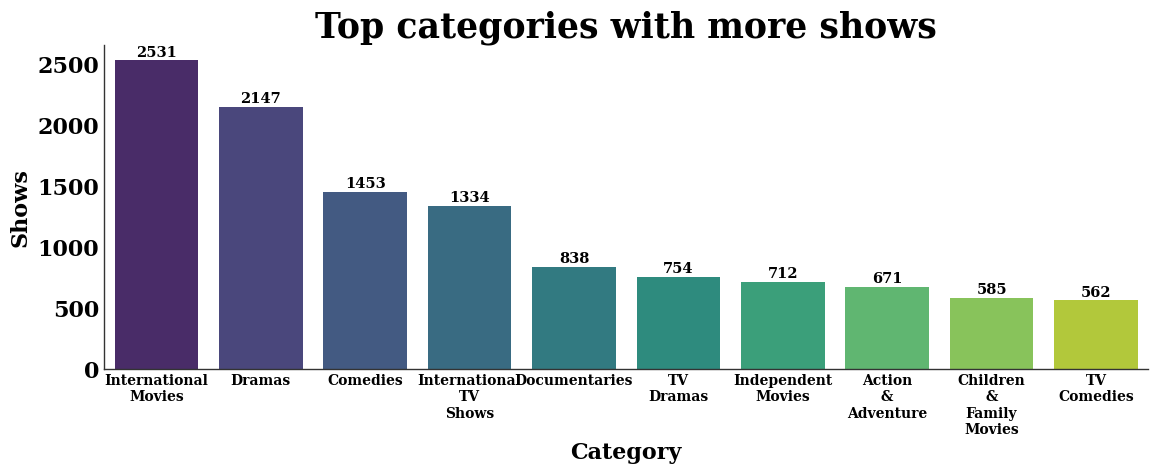

In [38]:
###Categorías con más shows

top_categories = df_filtered['listed_in'].str.split(', ',expand=True).stack().reset_index().drop(columns=['level_0','level_1']).value_counts().head(10).reset_index()


fig, ax = plt.subplots(figsize=(12,4))

sns.barplot(data=top_categories,x=0,y='count',hue=0,palette='viridis')
labels = [i.replace(' ','\n') for i in top_categories[0]]

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

ax.set_xlabel('Category')
ax.set_ylabel('Shows')
ax.set_title('Top categories with more shows')
ax.spines[['top','right']].set_visible(False)

for x, y in enumerate(top_categories['count']):
    ax.text(x,y+10,str(y),ha='center',va='bottom')
plt.show()

### Proceso de Machine Learning

In [39]:
##El objetivo es predecir qué influencia tiene la duración y el año de estreno d euna película en el rating de las películas.


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

##Paso 1: codificar las variables para que sean numéricas

variables_cat = df_filtered.select_dtypes('O')

label = LabelEncoder()

for col in variables_cat:
    df_filtered[col] = label.fit_transform(df_filtered[col].astype(str))


C:\Users\User\AppData\Local\Temp\ipykernel_16128\88565267.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = label.fit_transform(df_filtered[col].astype(str))
C:\Users\User\AppData\Local\Temp\ipykernel_16128\88565267.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = label.fit_transform(df_filtered[col].astype(str))
C:\Users\User\AppData\Local\Temp\ipykernel_16128\88565267.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

<Axes: >

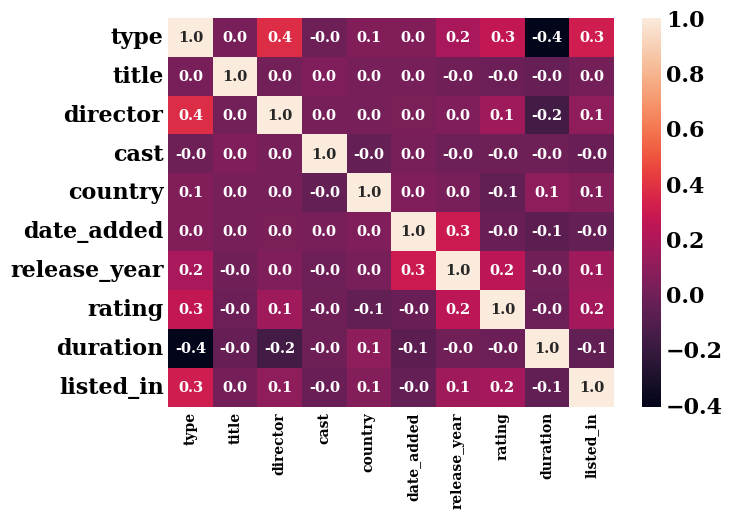

In [40]:
##Determinar correlaciones

sns.heatmap(df_filtered.corr(),annot=True,fmt='.1f')

### Insight 1: Determinar la relación entre duration, año de estreno y rating de las películas

In [49]:
df_films = df_filtered.loc[df_filtered['type']==0]

##Librerías 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


##Modelo de regresion lineal simple

linear = LinearRegression()

x = df_films[['duration','release_year']]
y = df_films['rating']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=3)

linear.fit(x_train,y_train)

y_pred = linear.predict(x_test)

##Evaluar el modelo

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('El rendimiento del modelo fue: ', f'\nMSE = {mse:.3f}\nMAE = {mae:.3f}\nR2 = {r2:.3f}')

El rendimiento del modelo fue:  
MSE = 3.420
MAE = 1.512
R2 = 0.073


In [69]:
##Modelo de regresion polinomial y ajuste de hiperparámetros

from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree=3)

x_pol = pol.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_pol, y,test_size=0.25,random_state=123)

polinomial = LinearRegression()

polinomial.fit(x_train,y_train)

y_pred = polinomial.predict(x_test)

##Evaluar el modelo

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('Rendimiento del modelo antes del ajuste de hiperparámetros:\n',f'\bMSE: {mse:.2f}\nR2: {r2:.2f}')


Rendimiento del modelo antes del ajuste de hiperparámetros:
MSE: 3.26
R2: 0.16


In [65]:
##Prediccion usando Random Forest y ajuste de hiperparámetros

from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor(n_estimators=100, random_state=123)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=123)

random.fit(x_train,y_train)

y_pred = random.predict(x_test)

##Evaluar el rendimiento

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'El rendimiento antes de ajustar los hiperparámetros es:\nMSE: {mse:.2f}\nR2: {r2:.2f}')


###Ajuste de hiperparámetros


from sklearn.model_selection import GridSearchCV

parametros = {

    'n_estimators':[50,100,200],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt']
}

random = RandomForestRegressor(random_state=456)

grid_search = GridSearchCV(estimator=random,param_grid=parametros,cv=5,n_jobs=-1,verbose=2, scoring='neg_mean_squared_error')


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=456)

grid_search.fit(x_train,y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'El rendimiento después de ajustar los hiperparámetros es:\nMSE: {mse:.2f}\nR2: {r2:.2f}')



El rendimiento antes de ajustar los hiperparámetros es:
MSE: 3.95
R2: -0.02
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py"

El rendimiento después de ajustar los hiperparámetros es:
MSE: 3.28
R2: 0.15


## Conclusión

* Fueron usados 3 modelos de Machine Learning para predecir los puntajes de shows de Netflix a partir del año de estreno y duración de las películas. El mejor modelo fue el de Regresión polinomial con un R cuadrado de 0.16. Es decir, el modelo puede explicar aproximadamente el 16% de la variación de los valores del Rating. 
* El modelo sugiere que la duración y el año de estreno tienen un impacto significativo en el rating.
* La información podría ser de ayuda para Netflix en su selección de contenido y estrategias de Marketing para estimar el potencial de éxito de sus películas según la fecha de estreno